In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

df = pd.read_csv("./SalaryData.csv")

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df.shape

(30, 2)

In [3]:
df.isnull().values.any()

False

In [4]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
df_copy = train_set.copy()

In [6]:
df_copy.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.187500,74207.625000
std,2.943129,28240.733473
min,1.100000,37731.000000
25%,2.975000,55456.750000
50%,4.300000,62164.500000
75%,7.300000,99030.250000
max,10.500000,122391.000000


In [7]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.00000,0.98211
Salary,0.98211,1.00000


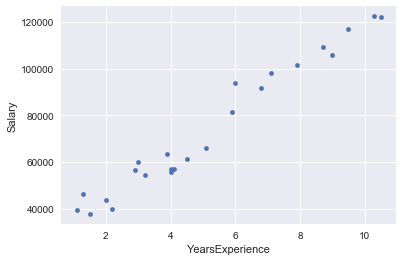

In [8]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

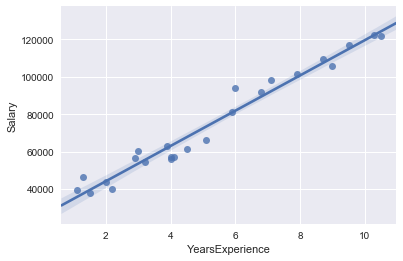

In [9]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df_copy)

In [10]:
train_set_full = train_set.copy()

train_set = train_set.drop(["Salary"], axis=1)

In [11]:
train_set.head()

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


In [12]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Salary"], axis=1)

In [13]:
test_set.head()

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2


In [14]:
train_labels = df_copy["Salary"]

In [15]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

('Coefficients: ', array([9423.81532303]))
('Intercept: ', 25321.583011776813)


In [17]:
#model formula
#y=9423.81532303x+25321.580118

In [18]:
salary_pred = lin_reg.predict(test_set)

salary_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [19]:
#salary_pred = lin_reg.predict(10)

#salary_pred

In [20]:
print(salary_pred)
print(test_set_full["Salary"])

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [21]:
lin_reg.score(test_set, test_set_full["Salary"])

0.9024461774180497

In [22]:
r2_score(test_set_full["Salary"], salary_pred)

0.9024461774180497

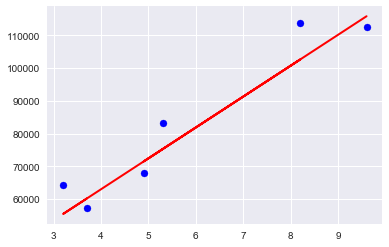

In [23]:
plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"],  color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)